### Задание

С 79 объясняющими переменными, описывающими (почти) каждый аспект жилых домов в Эймсе, штат Айова, этот конкурс ставит перед вами задачу предсказать конечную цену каждого дома.

### Описание датасета:

Вот краткая версия того, что вы найдете в файле описания данных.

SalePrice - цена продажи недвижимости в долларах. Это целевая переменная, которую вы пытаетесь предсказать.
MSSubClass: Класс здания
MSZoning: Общая классификация зонирования
LotFrontage: Фасад участка: линейные футы улицы, подключенной к собственности
LotArea: Площадь участка: Размер участка в квадратных футах
Street: Тип подъездной дороги
Alley: Тип доступа к переулку
LotShape: Форма участка: Общая форма собственности
LandContour: Контур участка: Ровность участка
Utilities: Коммунальные услуги: Тип доступных коммунальных услуг
LotConfig:  Конфигурация лота
LandSlope: Уклон участка
Neighborhood: Окрестности: Физические местоположения в пределах города Эймс
Condition1: Близость к главной дороге или железной дороге
Condition2: Близость к главной дороге или железной дороге (при наличии второй)
BldgType: Тип жилого помещения
HouseStyle: Стиль дома: Стиль жилища
OverallQual: Общее качество материала и отделки
OverallCond:Оценка общего состояния
YearBuilt: Год постройки: Первоначальная дата постройки
YearRemodAdd: Дата реконструкции

RoofStyle: Стиль крыши: Тип крыши
RoofMatl:  Кровельный материал
Exterior1st: Наружное покрытие дома
Exterior2nd: Наружное покрытие дома (если используется более одного материала)
MasVnrType: Тип облицовки каменной кладки
MasVnrArea: Площадь облицовки каменной кладки в квадратных футах
ExterQual:Качество наружного материала
ExterCond: Внешний вид: Текущее состояние материала на внешней стороне

Foundation: Фундамент: Тип фундамента

BsmtQual: Высота подвала
BsmtCond: Общее состояние подвала
BsmtExposure: Стены подвала на уровне прохода или сада
BsmtFinType1: Качество отделки подвала
BsmtFinSF1: Тип 1 готовые квадратные футы
BsmtFinType2: Качество второй готовой области (если таковая имеется)
BsmtFinSF2: готовые квадратные футы типа 2
BsmtUnfSF: Незаконченные квадратные футы подвальной площади
TotalBsmtSF: Общая площадь подвала в квадратных футах

Heating: Отопление: Тип отопления
HeatingQC: Качество и состояние отопления
CentralAir: Центральное кондиционирование воздуха
Electrical: Электрическая система

1stFlrSF: Площадь первого этажа в квадратных футах
2ndFlrSF: площадь второго этажа в квадратных футах
LowQualFinSF: Низкое качество готовых квадратных футов (все этажи)
GrLivArea: Жилая площадь: надземная жилая площадь в квадратных футах

BsmtFullBath: полностью оборудованные ванные комнаты на цокольном этаже
BsmtHalfBath: половина ванных комнат на цокольном этаже
FullBath: Полные ванные комнаты выше класса
HalfBath: Половинные ванны выше класса

Bedroom: Количество спален выше уровня подвала

Kitchen: Количество кухонь
KitchenQual: Качество кухни

TotRmsAbvGrd: Общее количество номеров выше класса (не включает ванные комнаты)
Functional: Рейтинг функциональности дома

Fireplaces: Количество каминов
FireplaceQu: Качество камина

GarageType: Расположение гаража
GarageYrBlt: Год постройки гаража
GarageFinish: Внутренняя отделка гаража
GarageCars: Размер гаража в вместимости автомобиля
GarageArea: Размер гаража в квадратных футах
GarageQual: Гаражное качество
GarageCond: Состояние гаража

PavedDrive: Мощеная подъездная дорожка

WoodDeckSF: площадь деревянной палубы в квадратных футах
OpenPorchSF: Площадь открытой веранды в квадратных футах
EnclosedPorch: площадь закрытой веранды в квадратных футах
3SsnPorch: площадь веранды на три сезона в квадратных футах
ScreenPorch: Площадь экранной веранды в квадратных футах

PoolArea: Площадь бассейна в квадратных футах
PoolQC: Качество пула

Fence: Качество забора

MiscFeature: Разные функции, не включенные в другие категории
MiscVal: Стоимость разных функций
MoSold: Месяц продан
YrSold: Год продажи
SaleType: Тип продажи
SaleCondition: Условие продажи

### Подключение библиотек и скриптов

In [78]:
import numpy as np
import pandas as pd
import pandas_profiling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import KFold, GridSearchCV
#from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

matplotlib.rcParams.update({'font.size': 14})

### Пути к директориям и файлам

In [79]:
TRAIN_DATASET_PATH = './train.csv'
TEST_DATASET_PATH = './test.csv'

### Загрузка данных

In [80]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
644,645,20,FV,85.0,9187,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,New,Partial,370878
995,996,50,RL,51.0,4712,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2006,WD,Abnorml,121600
1029,1030,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,118000
1259,1260,20,RL,65.0,9750,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,151000
903,904,20,RL,50.0,14859,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,8,2006,New,Partial,240000
1345,1346,30,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,108500
372,373,120,RL,50.0,7175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,125000
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
302,303,20,RL,118.0,13704,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2006,WD,Normal,205000
1035,1036,20,RL,NaN,11500,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,WD,Normal,84000


In [81]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [82]:
train_df.shape, test_df.shape

((1460, 81), (1459, 80))

### Анализ и  обработка данных

In [83]:
feature_names = train_df.columns.tolist() 
for column in feature_names: 
    print(column) 
    print(train_df[column].value_counts(dropna=False)) 

Id
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
LotFrontage
NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
38.0       1
33.0       1
150.0      1
46.0       1
Name: LotFrontage, Length: 111, dtype: int64
LotArea
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64
Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
Alley
NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
LotShape
Reg

In [84]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [85]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [86]:
#pandas_profiling.ProfileReport(train_df)

In [87]:
#pandas_profiling.ProfileReport(test_df)

Выводы:
1. Преобразовать из категориальных признаков в числовые:

2. Проверить на выбросы:

    LotFrontage
    LotArea
    BsmtFinSF1
    BsmtUnfSF
    MasVnrArea has 861 (59.0%) zeros	Zeros
    2ndFlrSF has 829 (56.8%) zeros	Zeros
    WoodDeckSF has 761 (52.1%) zeros	Zeros
    OpenPorchSF has 656 (44.9%) zeros	Zeros
    
3. Удалить признаки: 

Те, у которых значения равныe NaN и 0 больше 80%. 
Те, у которых значения более 80% принадлежат одному числу или категории
    
    Condition2 - одинаковые значения, оставить что-то одно Condition1
    Exterior2nd - одинаковые значения, оставить что-то одно Exterior1st
    GarageQual - одинаковые значения, оставить что-то одно GarageCond
    Alley has 1369 (93.8%) missing values	Missing
    PoolQC has 1453 (99.5%) missing values	Missing
    MiscFeature has 1406 (96.3%) missing values	Missing 
    BsmtFinSF2 has 1293 (88.6%) zeros	Zeros
    LowQualFinSF has 1434 (98.2%) zeros	Zeros
    EnclosedPorch has 1252 (85.8%) zeros	Zeros
    3SsnPorch has 1436 (98.4%) zeros	Zeros
    ScreenPorch has 1344 (92.1%) zeros	Zeros
    PoolArea has 1453 (99.5%) zeros	Zeros
    MiscVal has 1408 (96.4%) zeros
    FireplaceQu    770 известно, остальные Nan
    Fence has 1179 (80.8%) missing values	Missing
    KitchenAbvGr - Значения принадлежат одной категории или числу
    Utilities- Значения принадлежат одной категории или числу
    RoofMatl - CompShg    1434- Значения принадлежат одной категории или числу
    Heating - GasA     1428- Значения принадлежат одной категории или числу
    BsmtHalfBath - 0    1378- Значения принадлежат одной категории или числу
    Functional - Typ     1360- Значения принадлежат одной категории или числу
    PavedDrive - Y    1340- Значения принадлежат одной категории или числу
    3SsnPorch - 0      1436- Значения принадлежат одной категории или числу
    ScreenPorch - 0      1344- Значения принадлежат одной категории или числу
    SaleType - WD       1267 - Значения принадлежат одной категории или числу
    
4. Привести к среднему или повторяющемуся значению:
 
    GarageArea has 81 (5.5%) zeros	Zeros
    TotalBsmtSF has 37 (2.5%) zeros	Zeros
    BsmtUnfSF has 118 (8.1%) zeros	Zeros
    BsmtFinSF1 has 467 (32.0%) zeros	Zeros
    
    NAN:

    MasVnrType - 1452 известно, остальные NAN 
    MasVnrArea - 1452
    Electrical - 1459 категориальные
    LotFrontage has 259 (17.7%) missing values	Missing
    BsmtQual has 37 (2.5%) missing values	Missing категориальные
    BsmtCond has 37 (2.5%) missing values	Missing категориальные
    BsmtExposure has 38 (2.6%) missing values	Missing категориальные
    BsmtFinType1 has 37 (2.5%) missing values	Missing категориальные
    BsmtFinType2 has 38 (2.6%) missing values	Missing категориальные
    FireplaceQu has 690 (47.3%) missing values	Missing категориальные
    GarageType has 81 (5.5%) missing values	Missing категориальные
    GarageYrBlt has 81 (5.5%) missing values	Missing
    GarageFinish has 81 (5.5%) missing values	Missing категориальные
    GarageQual has 81 (5.5%) missing values	Missing
    GarageCond has 81 (5.5%) missing values	Missing


In [88]:
#удаление колонок
train_df = train_df.drop(['Condition2' , 'Exterior2nd', 'GarageQual', 'Alley', 'PoolQC', 'MiscFeature', '3SsnPorch', 
                          'BsmtFinSF2', 'LowQualFinSF','EnclosedPorch','3SsnPorch', 'ScreenPorch', 'SaleType',
                          'ScreenPorch', 'PoolArea', 'MiscVal', 'FireplaceQu', 'Fence', 'Utilities', 'PavedDrive',
                          'KitchenAbvGr', 'RoofMatl', 'Heating', 'BsmtHalfBath', 'Functional'], axis=1)

In [89]:
test_df = test_df.drop(['Condition2' , 'Exterior2nd', 'GarageQual', 'Alley', 'PoolQC', 'MiscFeature', '3SsnPorch', 
                          'BsmtFinSF2', 'LowQualFinSF','EnclosedPorch','3SsnPorch', 'ScreenPorch', 'SaleType',
                          'ScreenPorch', 'PoolArea', 'MiscVal', 'FireplaceQu', 'Fence',  'PavedDrive','Utilities',
                          'KitchenAbvGr', 'RoofMatl', 'Heating', 'BsmtHalfBath', 'Functional'], axis=1)

In [90]:
train_df.shape, test_df.shape

((1460, 58), (1459, 57))

In [91]:
# функция замены NaN медианой в колличественных признаках
def HandleMissingValues_num(df):
    cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
    values = {}
    
    for a in cols:
        values[a] = df[a].median()
        
    df.fillna(value=values, inplace=True)
    
    
HandleMissingValues_num(train_df)
HandleMissingValues_num(test_df)

In [92]:
# функция замены NaN mode в категориальных признаках
def HandleMissingValues_cat(df):
    
    for col in df:
        df[col] = df[col].fillna(df[col].mode()[0])
        
HandleMissingValues_cat(train_df)
HandleMissingValues_cat(test_df)

In [93]:
# функция проверки пропусков
def missingValuesInfo(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False) / len(df)*100, 2)
    temp = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return temp.loc[(temp['Total'] > 0)]

missingValuesInfo(train_df)
missingValuesInfo(test_df)

,Total,Percent


In [94]:
# преобразование категориальных признаков
categorical_df =train_df.select_dtypes(exclude = ['int', 'float'])

#categorical_df = train_df.select_dtypes(exclude=[np.number])

for feature in categorical_df:
    le = preprocessing.LabelEncoder()
    train_df[feature] = le.fit_transform(train_df[feature].astype(str))
    
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   LotConfig      1460 non-null   int32  
 9   LandSlope      1460 non-null   int32  
 10  Neighborhood   1460 non-null   int32  
 11  Condition1     1460 non-null   int32  
 12  BldgType       1460 non-null   int32  
 13  HouseStyle     1460 non-null   int32  
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [95]:
categorical_df =test_df.select_dtypes(exclude = ['int', 'float'])
#categorical_df = train_df.select_dtypes(exclude=[np.number])

for feature in categorical_df:
    le = preprocessing.LabelEncoder()
    test_df[feature] = le.fit_transform(test_df[feature].astype(str))
    
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int32  
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int32  
 6   LotShape       1459 non-null   int32  
 7   LandContour    1459 non-null   int32  
 8   LotConfig      1459 non-null   int32  
 9   LandSlope      1459 non-null   int32  
 10  Neighborhood   1459 non-null   int32  
 11  Condition1     1459 non-null   int32  
 12  BldgType       1459 non-null   int32  
 13  HouseStyle     1459 non-null   int32  
 14  OverallQual    1459 non-null   int64  
 15  OverallCond    1459 non-null   int64  
 16  YearBuilt      1459 non-null   int64  
 17  YearRemodAdd   1459 non-null   int64  
 18  RoofStyl

In [96]:
# Обработка выбросов интерквартильный размах
def IQ_param_get(df_, column_):
    m = df_[column_].median()
    c = column_
    IQ=df_[c].describe()['75%']-df_[c].describe()['25%']
    
    low_border=df_[c].describe()['25%']-IQ*1.5
    
    high_border=df_[c].describe()['75%']+IQ*1.5
 
    count1 = df_[(df_[c] < low_border) | (df_[c]> high_border)][c].count()
    
    result = {
        'IQ':IQ,
        'low_border':low_border,
        'high_border':high_border,
        'count': count1,
        'median': m
    }
    return result

In [97]:
# Обработка выбросов интерквартильный размах
def IQ_processing(df_, list_):
    
    for i in list_:
        c = i
        IQP = IQ_param_get(df_,c)
        print(c,IQP)
        df_[(df_[c] < IQP['low_border']) | (df_[c]> IQP['high_border'])]
        df_.loc[df_[c] > IQP['high_border'], c] = IQP['median']
        df_.loc[df_[c] < IQP['low_border'], c] = IQP['median']
        print('count after procesing:',df_[(df_[c] < IQP['low_border']) | (df_[c]> IQP['high_border'])][c].count())
    
    
# интерквартильный размах
list = ['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtUnfSF',  'MasVnrArea', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF']
print('processing dataframe train\n')
IQ_processing(train_df, list)
print('processing dataframe test\n')
IQ_processing(test_df, list)  

processing dataframe train

LotFrontage {'IQ': 19.0, 'low_border': 31.5, 'high_border': 107.5, 'count': 106, 'median': 69.0}
count after procesing: 0
LotArea {'IQ': 4048.0, 'low_border': 1481.5, 'high_border': 17673.5, 'count': 69, 'median': 9478.5}
count after procesing: 0
BsmtFinSF1 {'IQ': 712.25, 'low_border': -1068.375, 'high_border': 1780.625, 'count': 7, 'median': 383.5}
count after procesing: 0
BsmtUnfSF {'IQ': 585.0, 'low_border': -654.5, 'high_border': 1685.5, 'count': 29, 'median': 477.5}
count after procesing: 0
MasVnrArea {'IQ': 164.25, 'low_border': -246.375, 'high_border': 410.625, 'count': 98, 'median': 0.0}
count after procesing: 0
2ndFlrSF {'IQ': 728.0, 'low_border': -1092.0, 'high_border': 1820.0, 'count': 2, 'median': 0.0}
count after procesing: 0
WoodDeckSF {'IQ': 168.0, 'low_border': -252.0, 'high_border': 420.0, 'count': 32, 'median': 0.0}
count after procesing: 0
OpenPorchSF {'IQ': 68.0, 'low_border': -102.0, 'high_border': 170.0, 'count': 77, 'median': 25.0}
cou

In [98]:
# Функция оптимазации данных:
def reduce_mem_usage(df):
    start_mem = train_df.memory_usage().sum() / 1024 ** 2
    print('Memory usage of dataframe is {:.2f}MB'.format(start_mem))
    
    for col in train_df.columns:
        col_type = train_df[col].dtype
        
        if col_type != object:
            c_min = train_df[col].min()
            c_max = train_df[col].max()
            
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    train_df[col] = train_df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    train_df[col] = train_df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    train_df[col] = train_df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    train_df[col] = train_df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    train_df[col] = train_df[col].astype(np.float32)
                else:
                    train_df[col] = train_df[col].astype(np.float64)
        else:
            train_df[col] = train_df[col].astype('category')
            
    end_mem = train_df.memory_usage().sum() / 1024 ** 2
    print('Memory usage after optimization is: {:.2f}MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [99]:
train_df = reduce_mem_usage(train_df)
train_df.info()

Memory usage of dataframe is 0.48MB
Memory usage after optimization is: 0.13MB
Decreased by 73.8%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int16  
 1   MSSubClass     1460 non-null   int16  
 2   MSZoning       1460 non-null   int8   
 3   LotFrontage    1460 non-null   float32
 4   LotArea        1460 non-null   float32
 5   Street         1460 non-null   int8   
 6   LotShape       1460 non-null   int8   
 7   LandContour    1460 non-null   int8   
 8   LotConfig      1460 non-null   int8   
 9   LandSlope      1460 non-null   int8   
 10  Neighborhood   1460 non-null   int8   
 11  Condition1     1460 non-null   int8   
 12  BldgType       1460 non-null   int8   
 13  HouseStyle     1460 non-null   int8   
 14  OverallQual    1460 non-null   int8   
 15  OverallCond    1460 non-null   int8   
 16

In [100]:
test_df = reduce_mem_usage(test_df)
test_df.info()

Memory usage of dataframe is 0.13MB
Memory usage after optimization is: 0.13MB
Decreased by 0.0%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int32  
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int32  
 6   LotShape       1459 non-null   int32  
 7   LandContour    1459 non-null   int32  
 8   LotConfig      1459 non-null   int32  
 9   LandSlope      1459 non-null   int32  
 10  Neighborhood   1459 non-null   int32  
 11  Condition1     1459 non-null   int32  
 12  BldgType       1459 non-null   int32  
 13  HouseStyle     1459 non-null   int32  
 14  OverallQual    1459 non-null   int64  
 15  OverallCond    1459 non-null   int64  
 16 

1stFlrSF      TotalBsmtSF     0.819530
TotalBsmtSF   1stFlrSF        0.819530
GrLivArea     TotRmsAbvGrd    0.825489
TotRmsAbvGrd  GrLivArea       0.825489
GarageCars    GarageArea      0.882475
GarageArea    GarageCars      0.882475
Id            Id              1.000000
YrSold        YrSold          1.000000
BsmtQual      BsmtQual        1.000000
Foundation    Foundation      1.000000
ExterCond     ExterCond       1.000000
ExterQual     ExterQual       1.000000
MasVnrArea    MasVnrArea      1.000000
MasVnrType    MasVnrType      1.000000
Exterior1st   Exterior1st     1.000000
dtype: float64


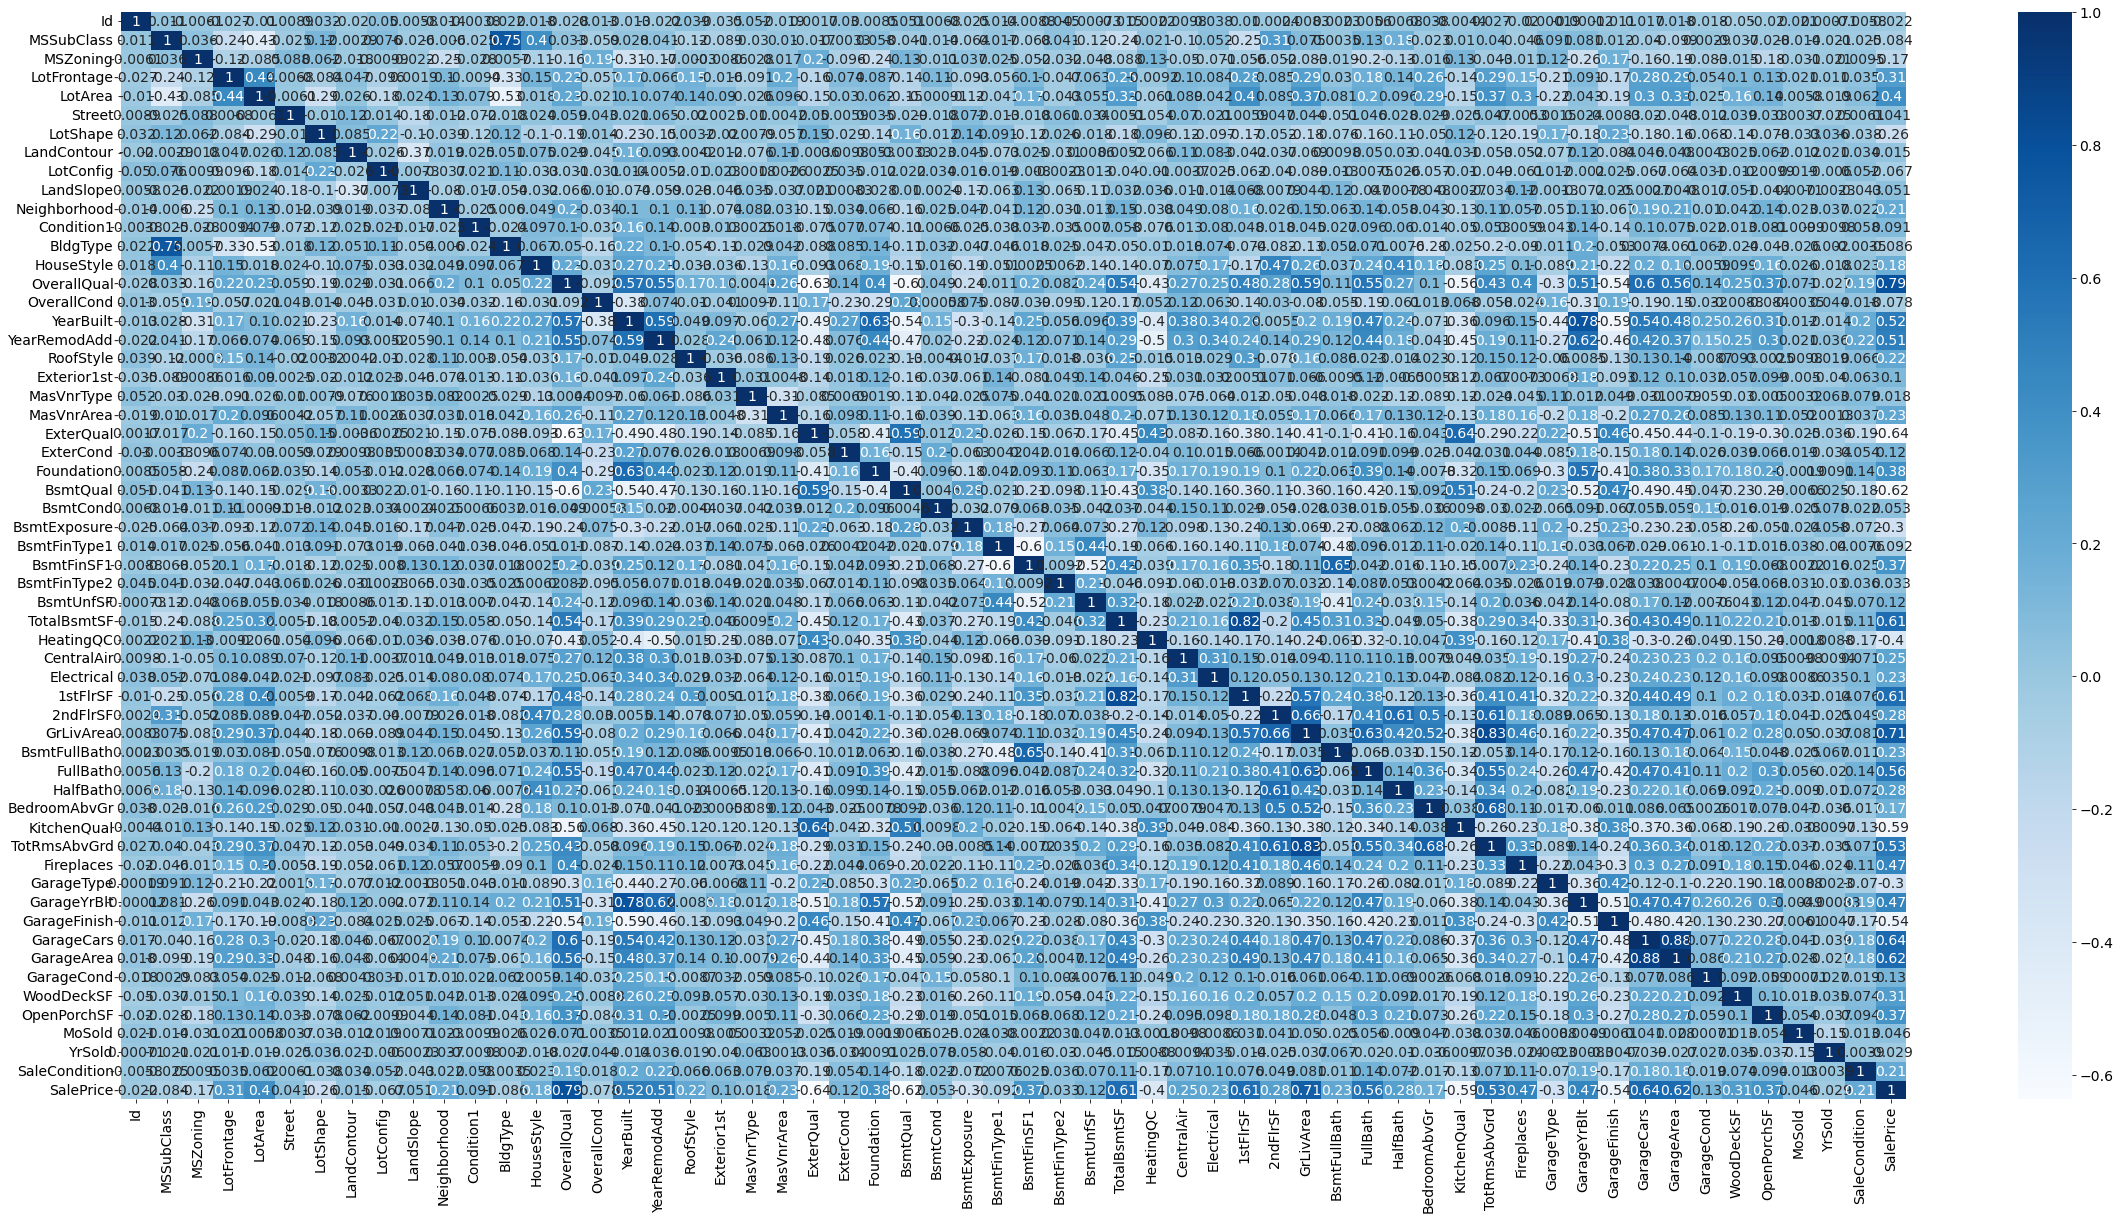

In [101]:
# Cильные корреляции между объектами
matrix = train_df.corr()
plt.figure(figsize = [40, 20])
sns.heatmap(matrix, annot = True, cmap = "Blues");

cor_pairs = matrix.unstack()
sorted_pairs = cor_pairs.sort_values(kind = 'quicksort')
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.8]

print(strong_pairs.head(15))

Вывод: Наблюдается сильная корреляция между 
1stFlrSF      TotalBsmtSF
TotRmsAbvGrd  GrLivArea
GarageArea    GarageCars

Будем удалять:
GarageCars
TotalBsmtSF
TotRmsAbvGrd

In [102]:
train_df = train_df.drop(['GarageCars' , 'TotalBsmtSF', 'TotRmsAbvGrd'], axis=1)
train_df.shape

(1460, 55)

In [103]:
test_df = test_df.drop(['GarageCars' , 'TotalBsmtSF', 'TotRmsAbvGrd'], axis=1)
test_df.shape

(1459, 54)

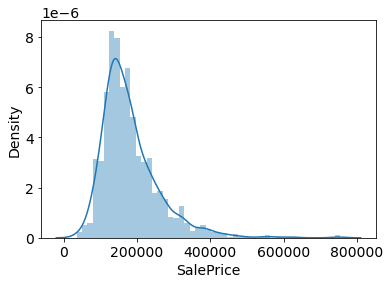

In [104]:
#histogram
sns.distplot(train_df['SalePrice']);

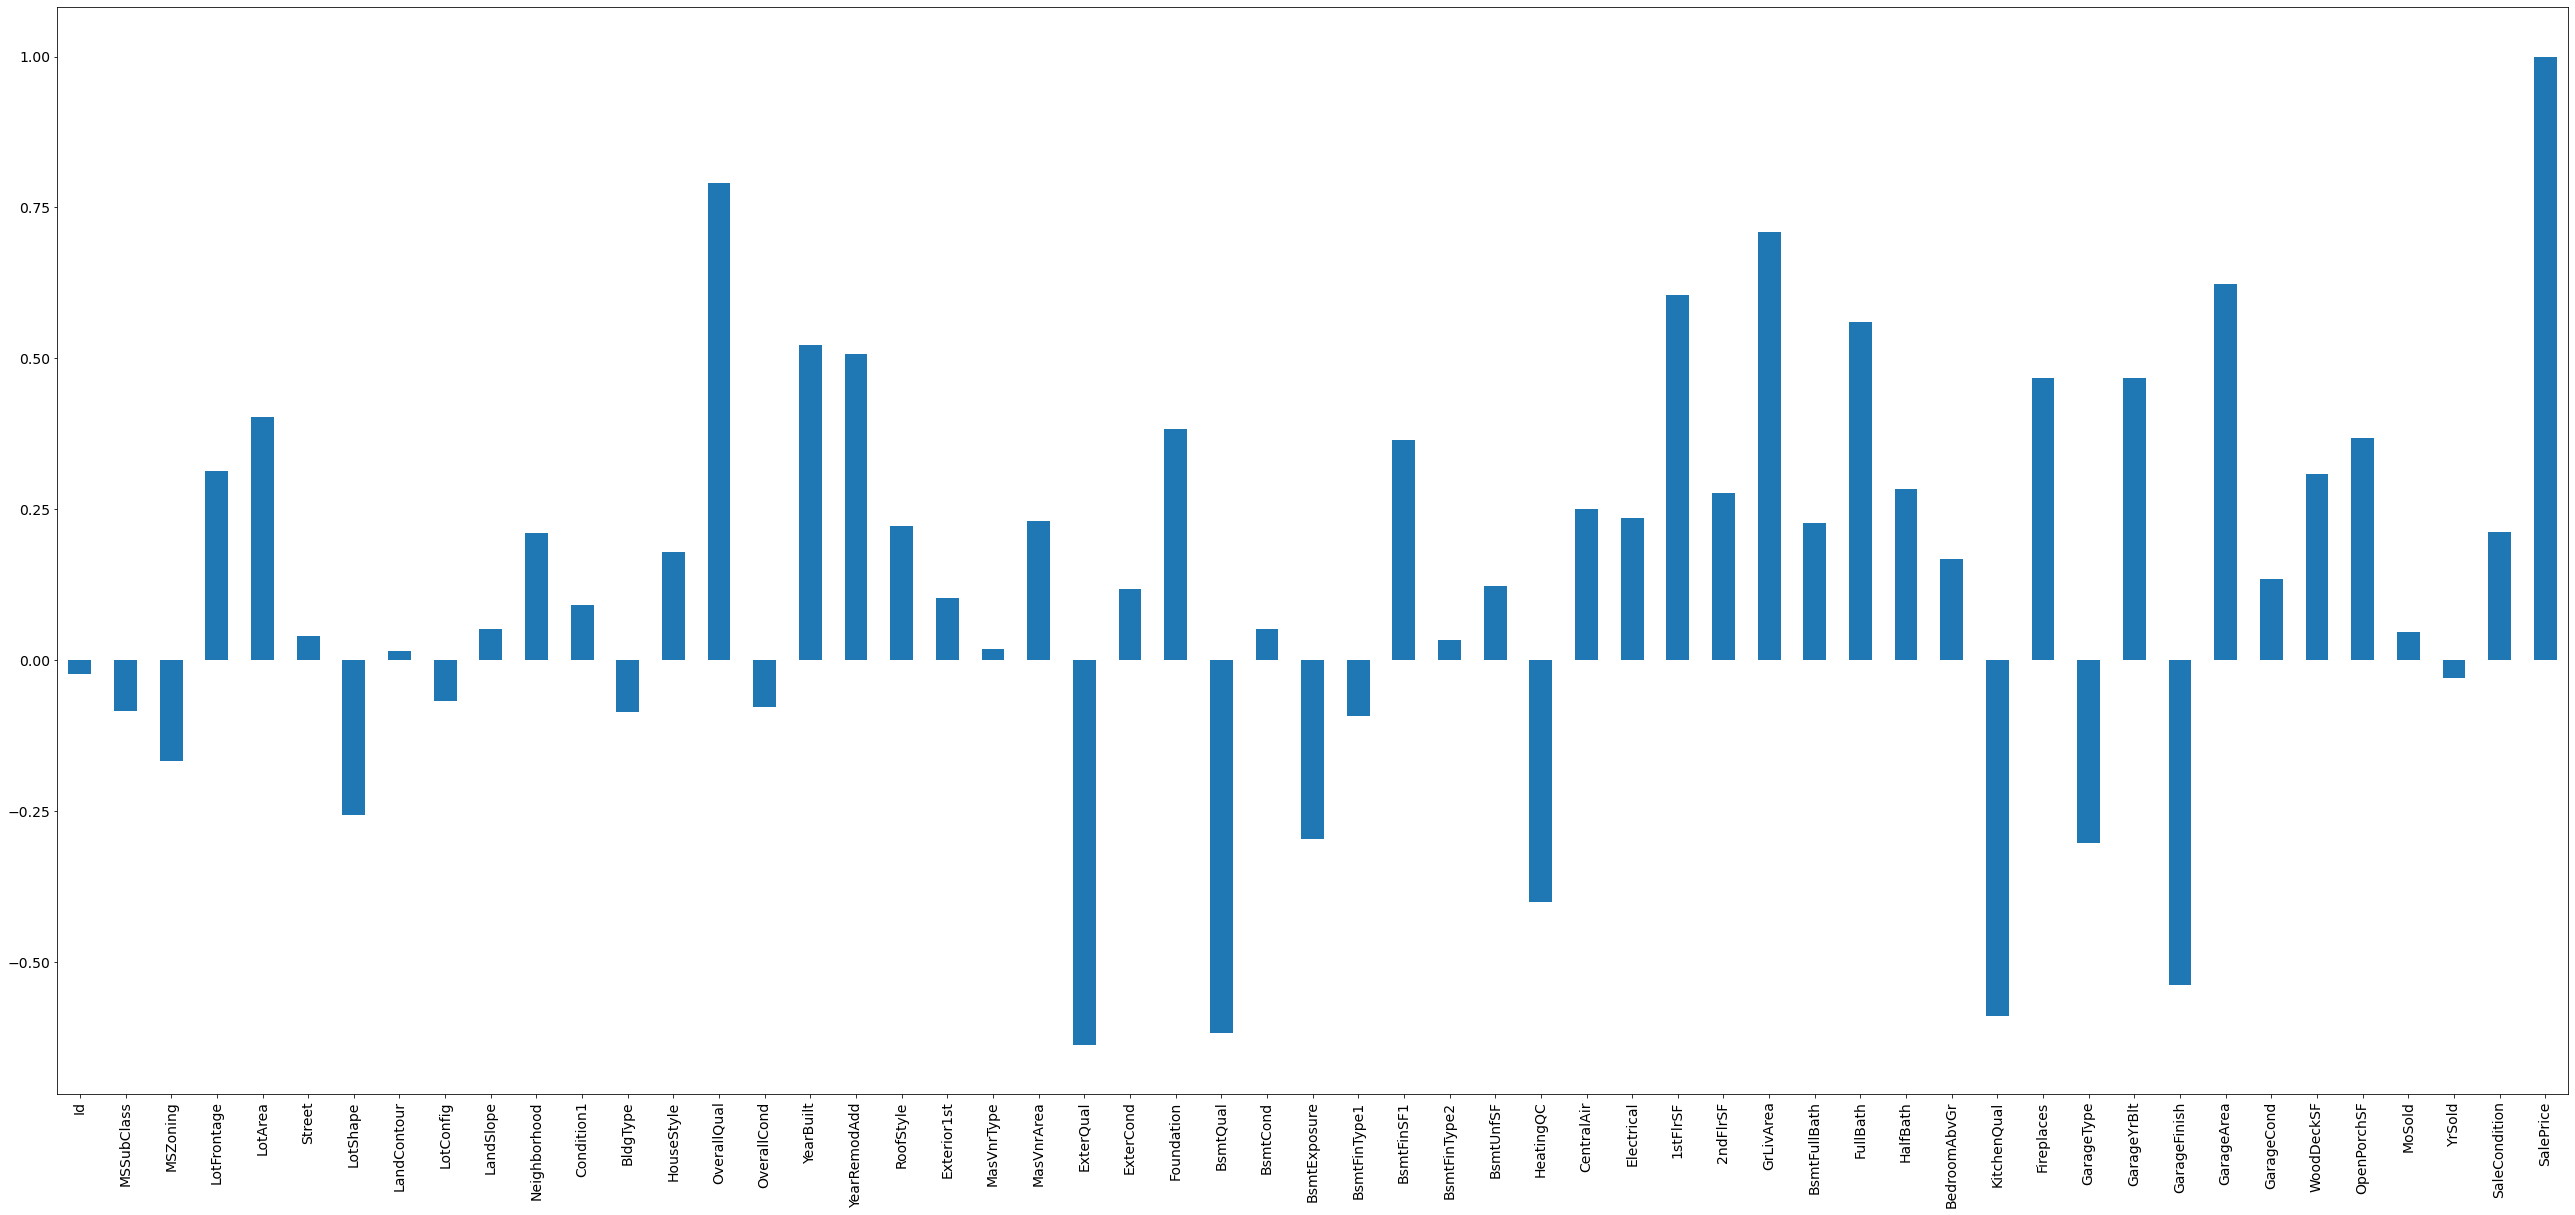

In [105]:
# кореляция с таргетом
_corr= train_df.corr()
corr_between_y = _corr['SalePrice']
_, ax = plt.subplots(figsize=(45, 20))
corr_between_y.plot.bar(ax=ax)
plt.show()

In [106]:
# корреляцию между признаками и таргетом.
train_df.corr()["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageArea       0.623431
1stFlrSF         0.605852
FullBath         0.560664
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
GarageYrBlt      0.466754
LotArea          0.403007
Foundation       0.382479
OpenPorchSF      0.368799
BsmtFinSF1       0.365283
LotFrontage      0.313281
WoodDeckSF       0.308855
HalfBath         0.284108
2ndFlrSF         0.277603
CentralAir       0.251328
Electrical       0.234945
MasVnrArea       0.231255
BsmtFullBath     0.227122
RoofStyle        0.222405
SaleCondition    0.213092
Neighborhood     0.210851
HouseStyle       0.180163
BedroomAbvGr     0.168213
GarageCond       0.134740
BsmtUnfSF        0.123422
ExterCond        0.117303
Exterior1st      0.103551
Condition1       0.091155
BsmtCond         0.052563
LandSlope        0.051152
MoSold           0.046432
Street           0.041036
BsmtFinType2     0.033235
MasVnrType       0.018216
LandContour 

In [107]:
train_df.shape, test_df.shape

((1460, 55), (1459, 54))

### Стандартизация и подготовка данных модели

In [108]:
feature_names = train_df.columns
feature_names.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtUnfSF',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenQual',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageArea',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'MoSold',
 'YrSold',
 'SaleCondition',
 'SalePrice']

In [109]:
target_name = ['SalePrice']
feature_names = [col for col in train_df[feature_names].head().columns 
                 if col not in ['SalePrice']]

In [110]:
X_train = train_df[feature_names]
X_test = test_df[feature_names]

In [111]:
X_train.shape, X_test.shape

((1460, 54), (1459, 54))

In [112]:
scaler = StandardScaler()
X_train_stand = scaler.fit_transform(X_train)
X_train_stand = pd.DataFrame(X_train_stand, columns=X_train.columns)

In [113]:
X_test_stand = scaler.transform(X_test)
X_test_stand = pd.DataFrame(X_test_stand, columns=X_test.columns)

In [114]:
X_train_stand.shape, X_test_stand.shape

((1460, 54), (1459, 54))

### Разбиение на train и test

In [115]:
X = X_train_stand[feature_names]
y = train_df[target_name]

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [117]:
X_train.shape, y_train.shape

((1022, 54), (1022, 1))

In [118]:
y = train_df['SalePrice']

In [119]:
X_test.shape, y_test.shape

((438, 54), (438, 1))

### Построение моделей

#### Построение модели Random Forest

In [120]:
random_forest_model = RandomForestRegressor()

In [121]:
params = {
    'n_estimators': [10, 30, 50, 100, 200],
    'max_depth': [100, 150, 200, 300, 400],
    'max_features': [10, 15, 25, 30, 40, 50, 55],
}

In [122]:
%%time
forest_grid = GridSearchCV(random_forest_model, params, scoring='r2', 
                  cv=KFold(n_splits=10, random_state=42, shuffle=True), 
                  n_jobs=-1)
forest_grid.fit(X_train, y_train)

CPU times: total: 4.83 s
Wall time: 2min 1s


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [100, 150, 200, 300, 400],
                         'max_features': [10, 15, 25, 30, 40, 50, 55],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='r2')

In [123]:
forest_grid.best_params_

{'max_depth': 150, 'max_features': 10, 'n_estimators': 200}

In [124]:
forest_grid.best_score_

0.8398947271181033

Прогнозирование на тестовом датасете

In [125]:
def evaluate_preds(true_values, pred_values, save = False):
    print('R2:\t' + str(round(r2(true_values, pred_values), 3)) + '\n' + 
          'RMSE:\t' + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + '\n' +
          'MSE:\t' + str(round(mse(true_values, pred_values), 3)) 
         )
    
    plt.figure(figsize = (8, 8))
    sns.scatterplot(x = pred_values, y = true_values)
    plt.plot([0, 500000], [0, 500000], linestyle = '--', color = 'black')
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
        
    plt.show()

In [126]:
random_forest_test_model = RandomForestRegressor(max_depth=150,                                
                                    max_features=15,                                           
                                    n_estimators=100,
                                    random_state=42)

R2:	0.837
RMSE:	31313.137
MSE:	980512563.254


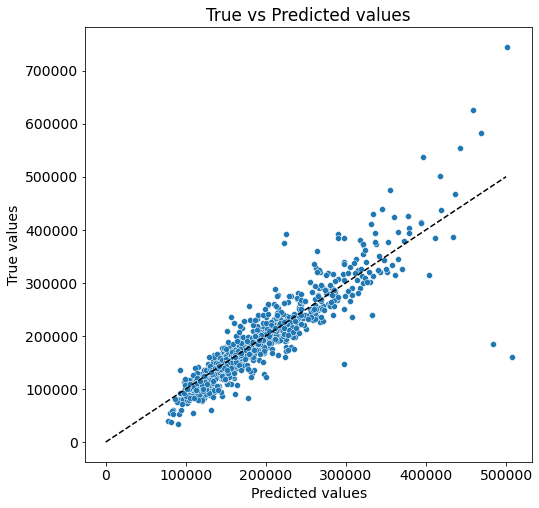

In [127]:
random_forest_test_model.fit(X_test, y_test)
y_train_preds = random_forest_test_model.predict(X_train)
evaluate_preds(np.squeeze(y_train.values), y_train_preds)

R2:	0.977
RMSE:	12592.417
MSE:	158568958.715


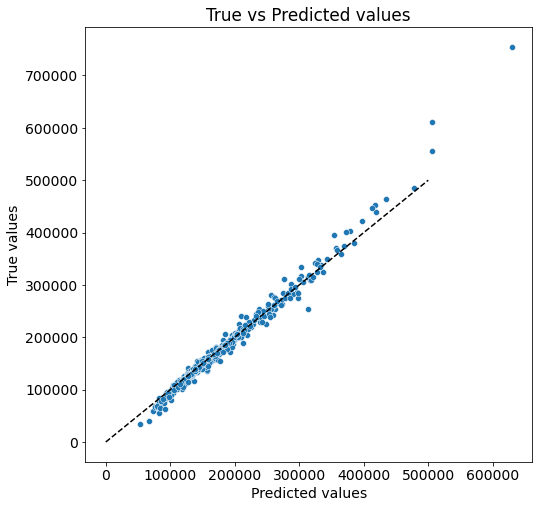

In [128]:
y_test_preds = random_forest_test_model.predict(X_test)
evaluate_preds(np.squeeze(y_test.values), y_test_preds)

#### Построение модели Gradient Boosting

In [129]:
params = {'n_estimators':300,
          'max_depth':50,
          'min_samples_leaf':3,
          'min_samples_split':3
          }

In [130]:
gb = GradientBoostingRegressor(**params)
gb.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=50, min_samples_leaf=3, min_samples_split=3,
                          n_estimators=300)

In [131]:
y_pred = gb.predict(X_test)

In [132]:
gb_score = gb.score(X_test, y_test)
gb_score

0.8755550474193332

R2:	1.0
RMSE:	2.404
MSE:	5.778


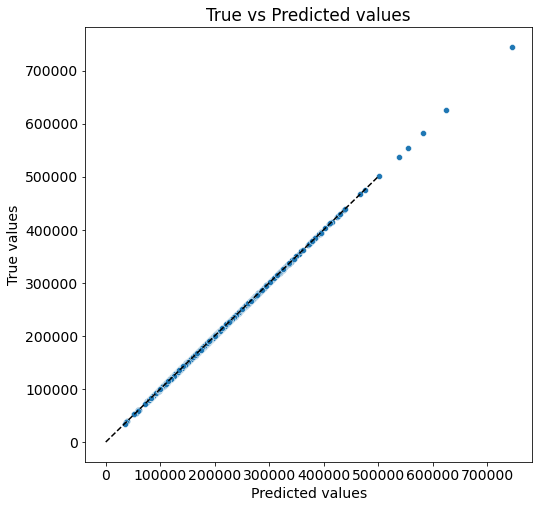

In [133]:
y_train_preds_gb = gb.predict(X_train)
evaluate_preds(np.squeeze(y_train.values), y_train_preds_gb)

R2:	0.876
RMSE:	29468.433
MSE:	868388547.184


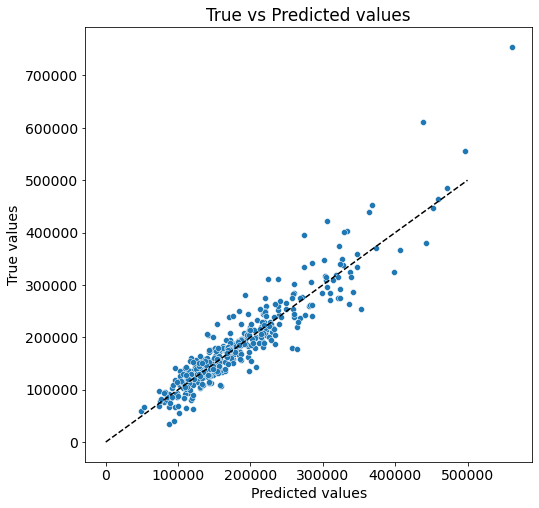

In [134]:
y_test_preds_gb = gb.predict(X_test)
evaluate_preds(np.squeeze(y_test.values), y_test_preds_gb)

### Финальная модель

In [135]:
y_pred = random_forest_test_model.predict(X_test_stand)

In [147]:
preds = pd.DataFrame()
preds['Id'] = X_test_stand.index
preds['SalePrice'] = y_pred

### Сохранение результатов

In [144]:
# preds.to_csv('submission.csv', index=False)
# preds.shape

(1459, 2)

In [145]:
df = pd.DataFrame(preds, columns=['SalePrice']).reset_index().rename(columns={'index':'Id'})
df['Id'] = df['Id'] + 1461
df.head()

,Id,SalePrice
0,1461,133836.16
1,1462,154892.09
2,1463,177258.87
3,1464,178956.50
4,1465,193135.52


In [146]:
df.to_csv('./submission.csv',index = False)